In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [280]:
#Importing the dataset
df= pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [281]:
df.shape

(614, 13)

The dataset has 613 rows and 13 columns

In [282]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We see that our target variable is of object type, making this a classification problem.

In [283]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We see that the unique values for categorical variables is 2 for most and 4 for dependents.
The LoanId has all of the unique values, so we can remove the column.

In [284]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see that Self Employed and Loan amount and credit history has the most number of NaN.
Let us fill the categorical variables missing values with the mode and the float one with the mean.

In [285]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [286]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [287]:
LoanAmount_mean=df['LoanAmount'].mean()
LoanAmount_mean

146.41216216216216

In [288]:
df['LoanAmount'].fillna(value=LoanAmount_mean, inplace=True)

In [289]:
LoanAmount_term_mean=df['Loan_Amount_Term'].mean()
LoanAmount_term_mean

342.0

In [290]:
df['Loan_Amount_Term'].fillna(value=LoanAmount_term_mean, inplace=True)

In [291]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [292]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [293]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have imputed all the missing values.
Checking for the counts of the categorical variables

In [294]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [295]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [296]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [297]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [298]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [299]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status count'}, xlabel='Loan_Status', ylabel='count'>

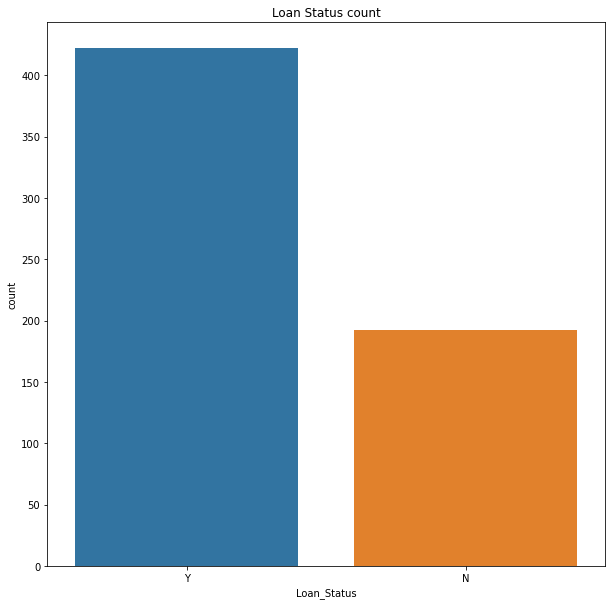

In [300]:
plt.figure(figsize=(10,10))
plt.title('Loan Status count')
sn.countplot(df['Loan_Status'])

We can see that our target class is imbalanced.

<AxesSubplot:xlabel='Married', ylabel='count'>

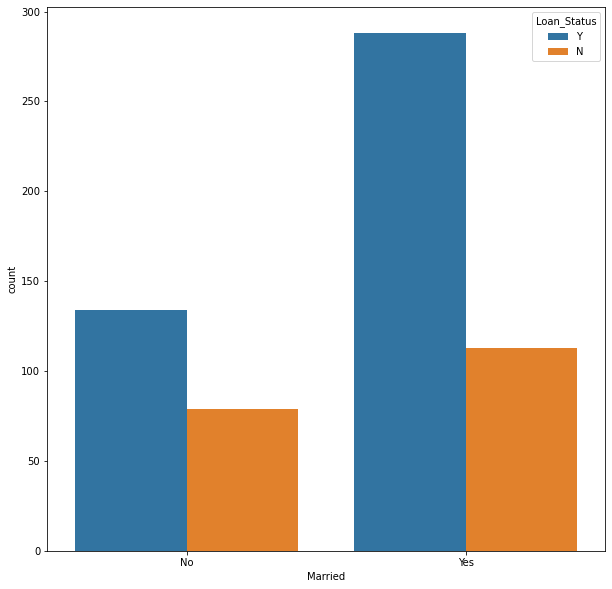

In [302]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Married', hue='Loan_Status')

We can see the trend that more married people are able to get loan compared to singles.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

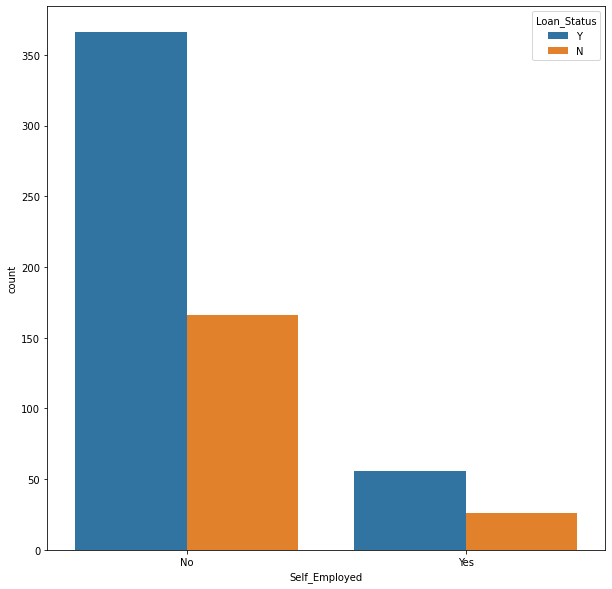

In [303]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Self_Employed', hue='Loan_Status')

We can see that the people working under an employer is more likely to get a loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

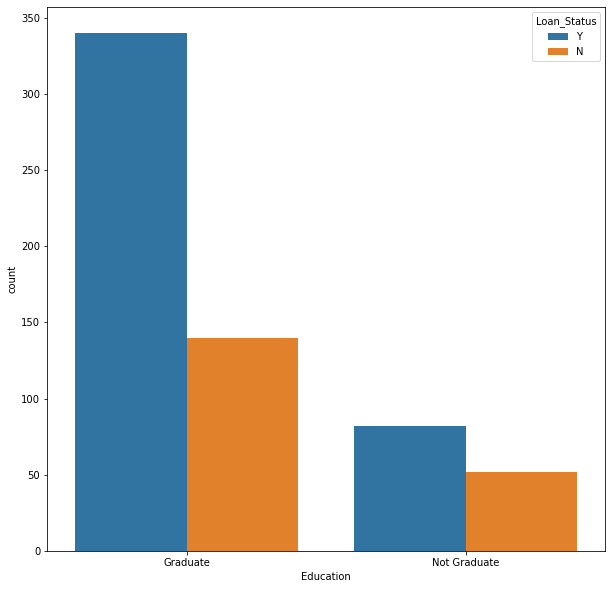

In [304]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Education', hue='Loan_Status')

Graduates are more likely to get a loan.

<AxesSubplot:xlabel='Gender', ylabel='count'>

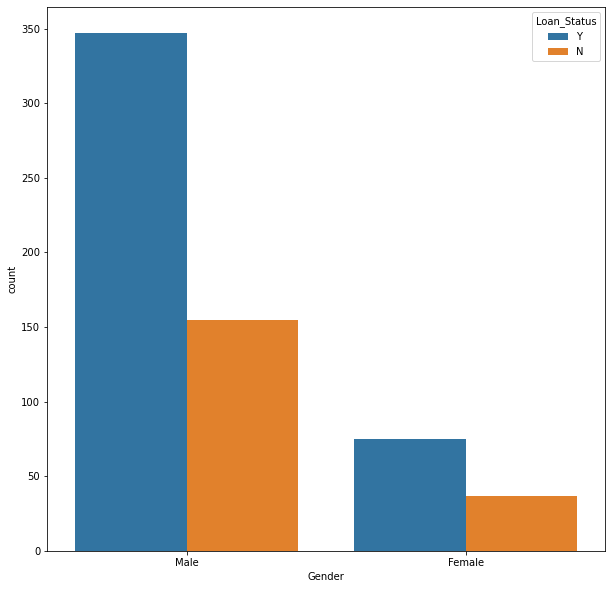

In [305]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Gender', hue='Loan_Status')

Men are more likely to get loan as compared to women.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

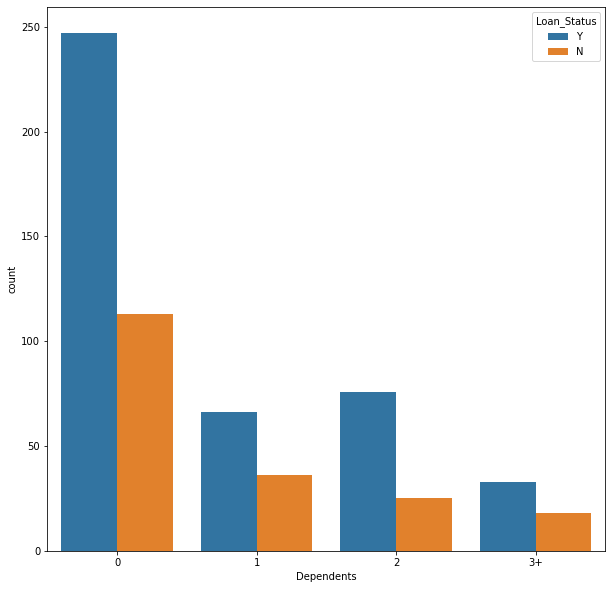

In [306]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Dependents', hue='Loan_Status')

We can see that there are more number of people with 0 dependents on the dataset.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

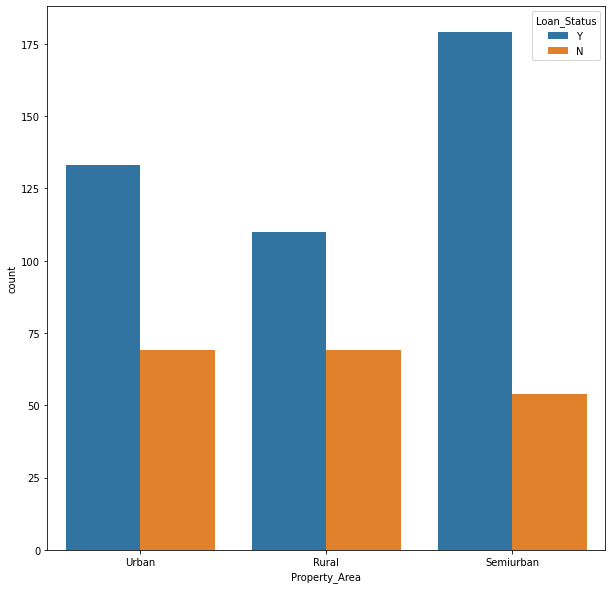

In [307]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Property_Area', hue='Loan_Status')

People from the semiurban area are more likely to get a loan

Let us encode the categorical variables to study the correlations further.

In [308]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])

In [310]:
le=LabelEncoder()
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in col:
    df[i] = le.fit_transform(df[i])
df
    


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


As the target variable is imabalanced.
Let us balance the target variable by upsampling the minority.

In [311]:
no_loan = df[df.Loan_Status==0]
yes_loan = df[df.Loan_Status==1]

In [312]:
from sklearn.utils import resample
#upsampling minority
loan_upsampled = resample(no_loan,
                         replace = True,
                         n_samples = len(yes_loan),
                         random_state =27)

In [313]:
df_upsampled = pd.concat([yes_loan,loan_upsampled])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

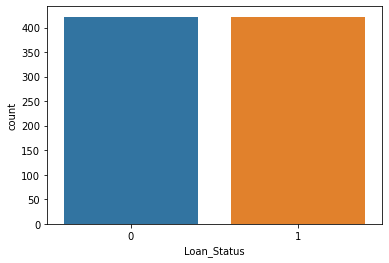

In [314]:
sn.countplot(df_upsampled['Loan_Status'])

Let us now compare all the above observations again with count plots.

<AxesSubplot:xlabel='Married', ylabel='count'>

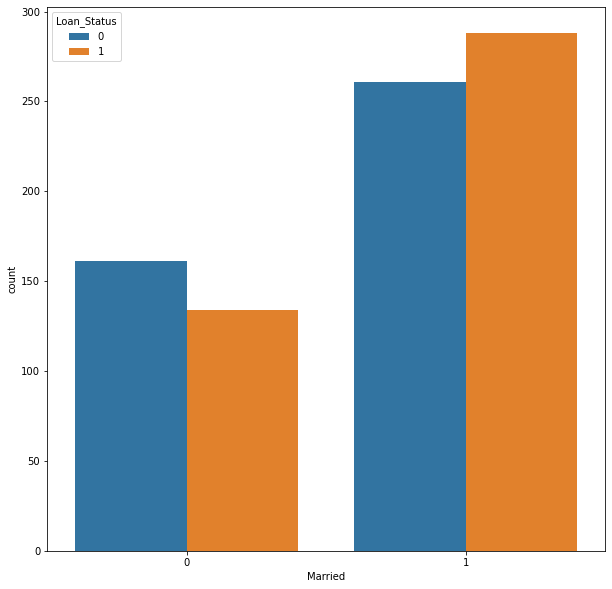

In [315]:
plt.figure(figsize=(10,10))
sn.countplot(data=df_upsampled, x='Married', hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

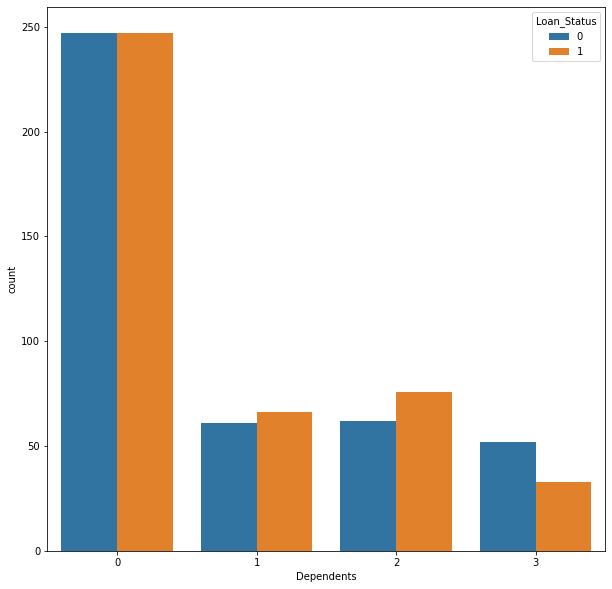

In [316]:
plt.figure(figsize=(10,10))
sn.countplot(data=df_upsampled, x='Dependents', hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

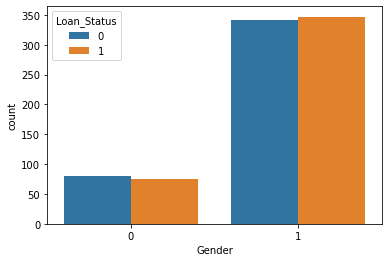

In [317]:
sn.countplot(data=df_upsampled, x='Gender', hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

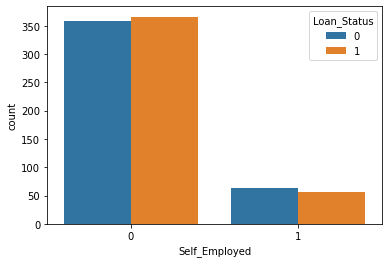

In [318]:
sn.countplot(data=df_upsampled, x='Self_Employed', hue='Loan_Status')

Checking the correlation.

In [319]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<AxesSubplot:>

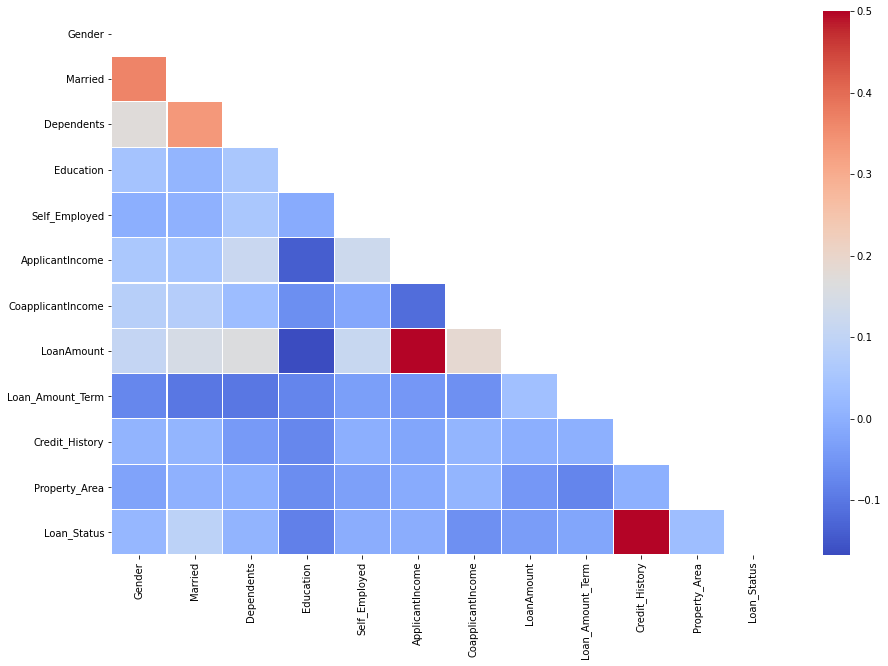

In [320]:
corr = df.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

<AxesSubplot:>

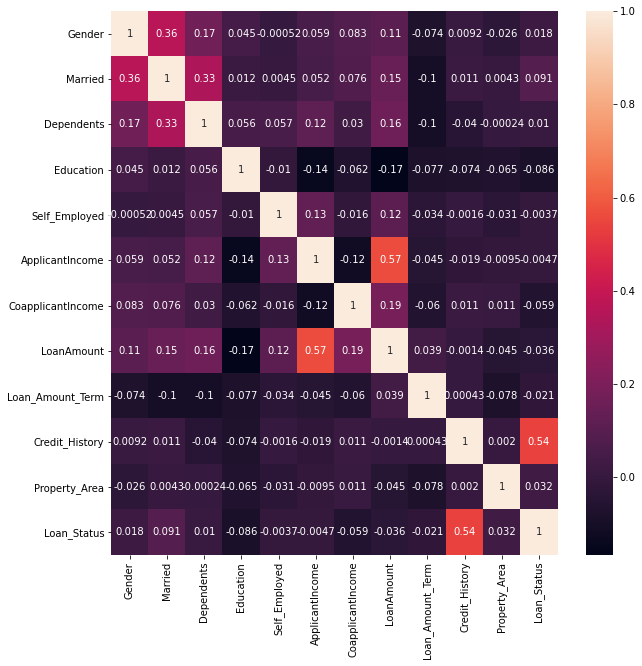

In [321]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)

We can see from the above heat map that Loan_Status is highly correlated to Credit History.

<b>Model Building<b>

In [322]:
df_upsampled = df_upsampled.drop("Loan_ID",axis =1)

In [323]:
y = df_upsampled['Loan_Status']
x = df_upsampled.drop(['Loan_Status'],axis = 1)

Scaling the datset.

In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4743034 , -1.36419095, -0.74229685, ...,  0.25395253,
         0.53167168,  1.25390754],
       [ 0.4743034 ,  0.73303521, -0.74229685, ...,  0.25395253,
         0.53167168,  1.25390754],
       [ 0.4743034 ,  0.73303521, -0.74229685, ...,  0.25395253,
         0.53167168,  1.25390754],
       ...,
       [-2.10835511, -1.36419095,  0.20982859, ...,  0.25395253,
         0.53167168, -0.00447292],
       [ 0.4743034 ,  0.73303521,  2.11407949, ..., -0.03766099,
        -1.88086002, -0.00447292],
       [ 0.4743034 ,  0.73303521, -0.74229685, ...,  0.25395253,
        -1.88086002, -1.26285337]])

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [326]:
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.909952606635071 on random state  52


In [327]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=maxrs)

Building 6 models to select the best ones.

In [328]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [329]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       109
           1       0.93      0.84      0.89       102

    accuracy                           0.90       211
   macro avg       0.90      0.89      0.90       211
weighted avg       0.90      0.90      0.90       211



In [330]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[103,   6],
       [ 16,  86]], dtype=int64)

In [331]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72       109
           1       0.69      0.92      0.79       102

    accuracy                           0.76       211
   macro avg       0.79      0.76      0.75       211
weighted avg       0.79      0.76      0.75       211



In [332]:
confusion_matrix(y_test,y_pred)

array([[66, 43],
       [ 8, 94]], dtype=int64)

In [333]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       109
           1       0.73      0.75      0.74       102

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211



In [334]:
confusion_matrix(y_test,y_pred)

array([[81, 28],
       [26, 76]], dtype=int64)

In [335]:
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.50      0.65       109
           1       0.64      0.95      0.77       102

    accuracy                           0.72       211
   macro avg       0.78      0.73      0.71       211
weighted avg       0.78      0.72      0.71       211



In [336]:
confusion_matrix(y_test,y_pred)

array([[55, 54],
       [ 5, 97]], dtype=int64)

In [337]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       109
           1       0.66      0.73      0.69       102

    accuracy                           0.69       211
   macro avg       0.69      0.69      0.69       211
weighted avg       0.69      0.69      0.69       211



In [338]:
confusion_matrix(y_test,y_pred)

array([[71, 38],
       [28, 74]], dtype=int64)

In [339]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       109
           1       0.90      0.91      0.91       102

    accuracy                           0.91       211
   macro avg       0.91      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211



In [340]:
confusion_matrix(y_test,y_pred)

array([[99, 10],
       [ 9, 93]], dtype=int64)

In [341]:
from sklearn.model_selection import cross_val_score

In [342]:
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())

0.8601507466892082


In [343]:
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

0.8957241476472244


In [344]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.6919484361792054


In [345]:
print(cross_val_score(abc,x_scaled,y,cv=5).mean())

0.7286700479008171


In [346]:
print(cross_val_score(knc,x_scaled,y,cv=5).mean())

0.7701394759087067


In [347]:
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.7203789799943646


In [348]:
from sklearn import metrics

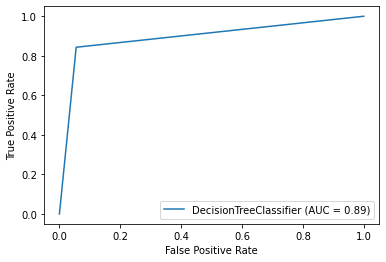

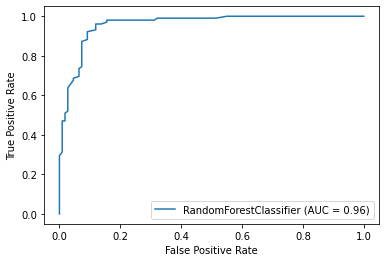

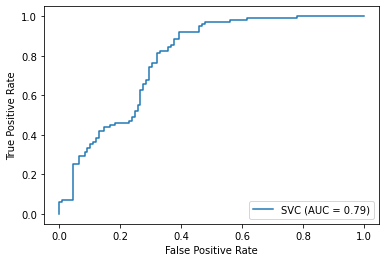

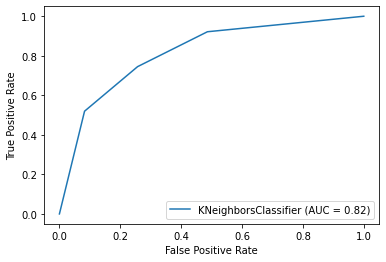

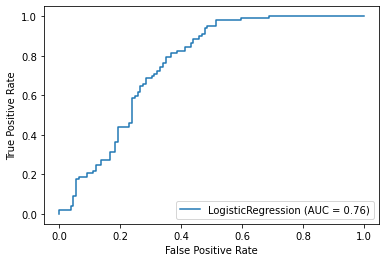

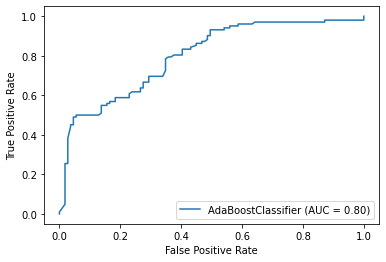

In [349]:
models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

We see that Random Forest Classifier is the best model according to the metrics.

<b>Hyper parameter Tuning<b>

In [350]:
from sklearn.model_selection import GridSearchCV

In [351]:
parameter = { 
            'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }

In [352]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [353]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [354]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2'}

In [355]:
Final_mod = RandomForestClassifier(criterion='gini',max_depth=24,max_features='sqrt')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

88.62559241706161


In [356]:
confusion_matrix(y_test,pred)

array([[96, 13],
       [11, 91]], dtype=int64)

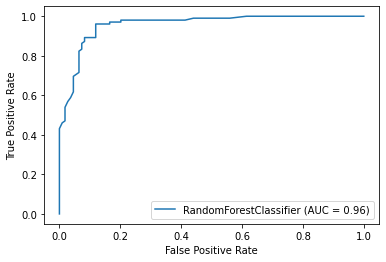

In [357]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

<b> Saving the model<b>

In [358]:
import joblib
joblib.dump(Final_mod,"LoanStatus.pkl")

['LoanStatus.pkl']